In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

In [2]:
train=pd.read_csv('train_dataset.csv',index_col=0)
test=pd.read_csv('test_dataset.csv',index_col=0)
pd.set_option('display.max_columns',None)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,4,2,4,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,3,5,4,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,4,4,3,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,2,2,2,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,4,3,4,4,5,2,5,3,5,4,0,10.0,0


# Ma'lumotlarni o'rganish

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [4]:
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   object 
 1   Customer Type                      4000 non-null   object 
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   object 
 4   Class                              4000 non-null   object 
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64

#### Nan qiymatlarni tashlab yuborish yoki yubormaslikni aqinlashitirb olamiz

In [6]:
def percent_nan(data):
    return data.isnull().sum().sum()/len(data)*100
print(f"Train set nans %: {percent_nan(train):.2f}")
print(f"Test set nans %: {percent_nan(test):.2f}")

Train set nans %: 0.28
Test set nans %: 0.47


In [7]:
train.fillna({'Arrival Delay in Minutes':0},inplace=True)
test.fillna({'Arrival Delay in Minutes':0},inplace=True)

In [8]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,4,2,4,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,3,5,4,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,4,4,3,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,2,2,2,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,4,3,4,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,2,5,4,4,4,1,4,4,4,3,21,12.0,0
9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,1,2,3,3,4,4,4,4,1,4,4,34,21.0,0
9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,3,4,5,4,4,4,4,3,4,3,37,38.0,1


### Grafiklar orqali ma'lumotlarni yaxshiroq o'rganamiz

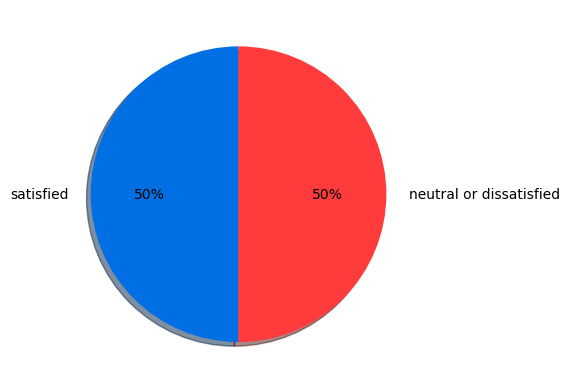

In [9]:
plt.pie(train['satisfaction'].value_counts(),
        labels=['satisfied','neutral or dissatisfied'],
        labeldistance=1.15,
        autopct='%1.f%%',
        radius=1,
        startangle=90,
        colors=['#006fe3','#ff3b3b'],
        shadow=True)
plt.show()

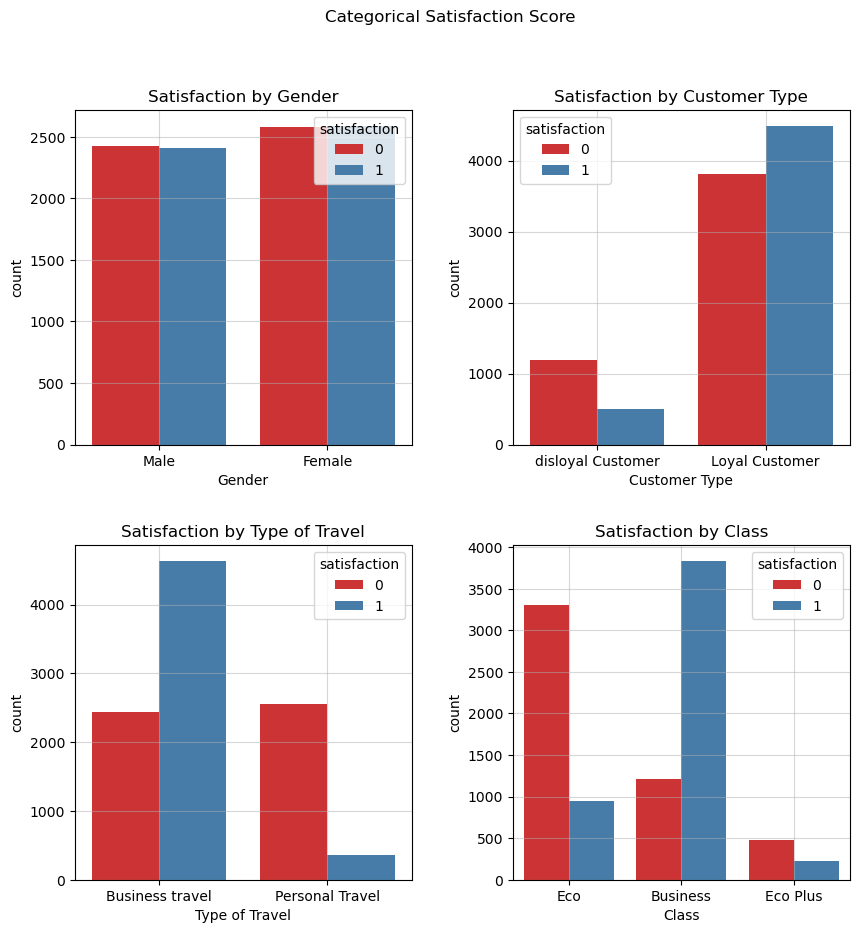

In [10]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Categorical Satisfaction Score')
fig.subplots_adjust(hspace=0.3,wspace=0.3)
def countplot(axe,cat):
    sns.countplot(ax=axe,x=train[cat],hue=train['satisfaction'],palette='Set1'), 
    axe.set_title(f"Satisfaction by {cat}")
    axe.grid(alpha=0.5)
countplot(ax[0,0],'Gender')
countplot(ax[0,1],'Customer Type')
countplot(ax[1,0],'Type of Travel')
countplot(ax[1,1],'Class')
#ax[0,0].set_title

In [11]:
corrs=train.corr().abs()
corrs.style.background_gradient('coolwarm')

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Age,1.000000,0.110823,0.020904,0.036071,0.026964,0.012077,0.021971,0.215613,0.169291,0.097421,0.073412,0.060124,0.040368,0.038761,0.036921,0.062409,0.015618,0.019221,0.144302
Flight Distance,0.110823,1.000000,0.002341,0.021320,0.052807,0.017513,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.011425,0.002841,0.298703
Inflight wifi service,0.020904,0.002341,1.000000,0.362355,0.730731,0.362702,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.019843,0.023277,0.277395
Departure/Arrival time convenient,0.036071,0.021320,0.362355,1.000000,0.456498,0.479002,0.001982,0.046456,0.002102,0.007094,0.071368,0.027487,0.072969,0.078166,0.062814,0.001172,0.010846,0.008799,0.067638
Ease of Online booking,0.026964,0.052807,0.730731,0.456498,1.000000,0.476405,0.017193,0.388220,0.016831,0.043574,0.053613,0.116333,0.044259,0.013875,0.032168,0.007301,0.001474,0.003883,0.164662
Gate location,0.012077,0.017513,0.362702,0.479002,0.476405,1.000000,0.002645,0.003610,0.008359,0.001144,0.015083,0.008752,0.000493,0.037372,0.003065,0.015090,0.001907,0.000727,0.007169
Food and drink,0.021971,0.065939,0.119807,0.001982,0.017193,0.002645,1.000000,0.239007,0.573063,0.598209,0.062373,0.045929,0.030299,0.087117,0.035568,0.641701,0.011761,0.011222,0.207854
Online boarding,0.215613,0.213859,0.438034,0.046456,0.388220,0.003610,0.239007,1.000000,0.414889,0.292397,0.165847,0.133977,0.080804,0.207733,0.077808,0.341899,0.001727,0.003483,0.504986
Seat comfort,0.169291,0.170203,0.107020,0.002102,0.016831,0.008359,0.573063,0.414889,1.000000,0.615310,0.136570,0.121991,0.081107,0.192491,0.074447,0.677454,0.014833,0.013604,0.342294
Inflight entertainment,0.097421,0.150573,0.198351,0.007094,0.043574,0.001144,0.598209,0.292397,0.615310,1.000000,0.442295,0.338588,0.393506,0.109921,0.418871,0.688927,0.029500,0.028990,0.400900


In [12]:
train.corrwith(train.satisfaction).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048573
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [13]:
pd.set_option('display.max_columns',None)
train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,4,2,4,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,3,5,4,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,4,4,3,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,2,2,2,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,4,3,4,4,5,2,5,3,5,4,0,10.0,0
6,Male,Loyal Customer,30,Personal Travel,Eco Plus,1034,2,4,2,2,5,2,5,5,4,5,5,4,4,5,0,0.0,0
7,Male,Loyal Customer,38,Business travel,Eco,826,5,1,1,1,5,5,5,5,1,4,4,5,4,5,2,5.0,1
8,Female,Loyal Customer,39,Business travel,Eco Plus,162,3,4,4,4,3,3,3,3,3,5,5,1,3,3,0,0.0,1
9,Male,disloyal Customer,43,Business travel,Business,541,2,2,2,5,3,2,3,3,5,2,5,4,4,3,0,0.0,0


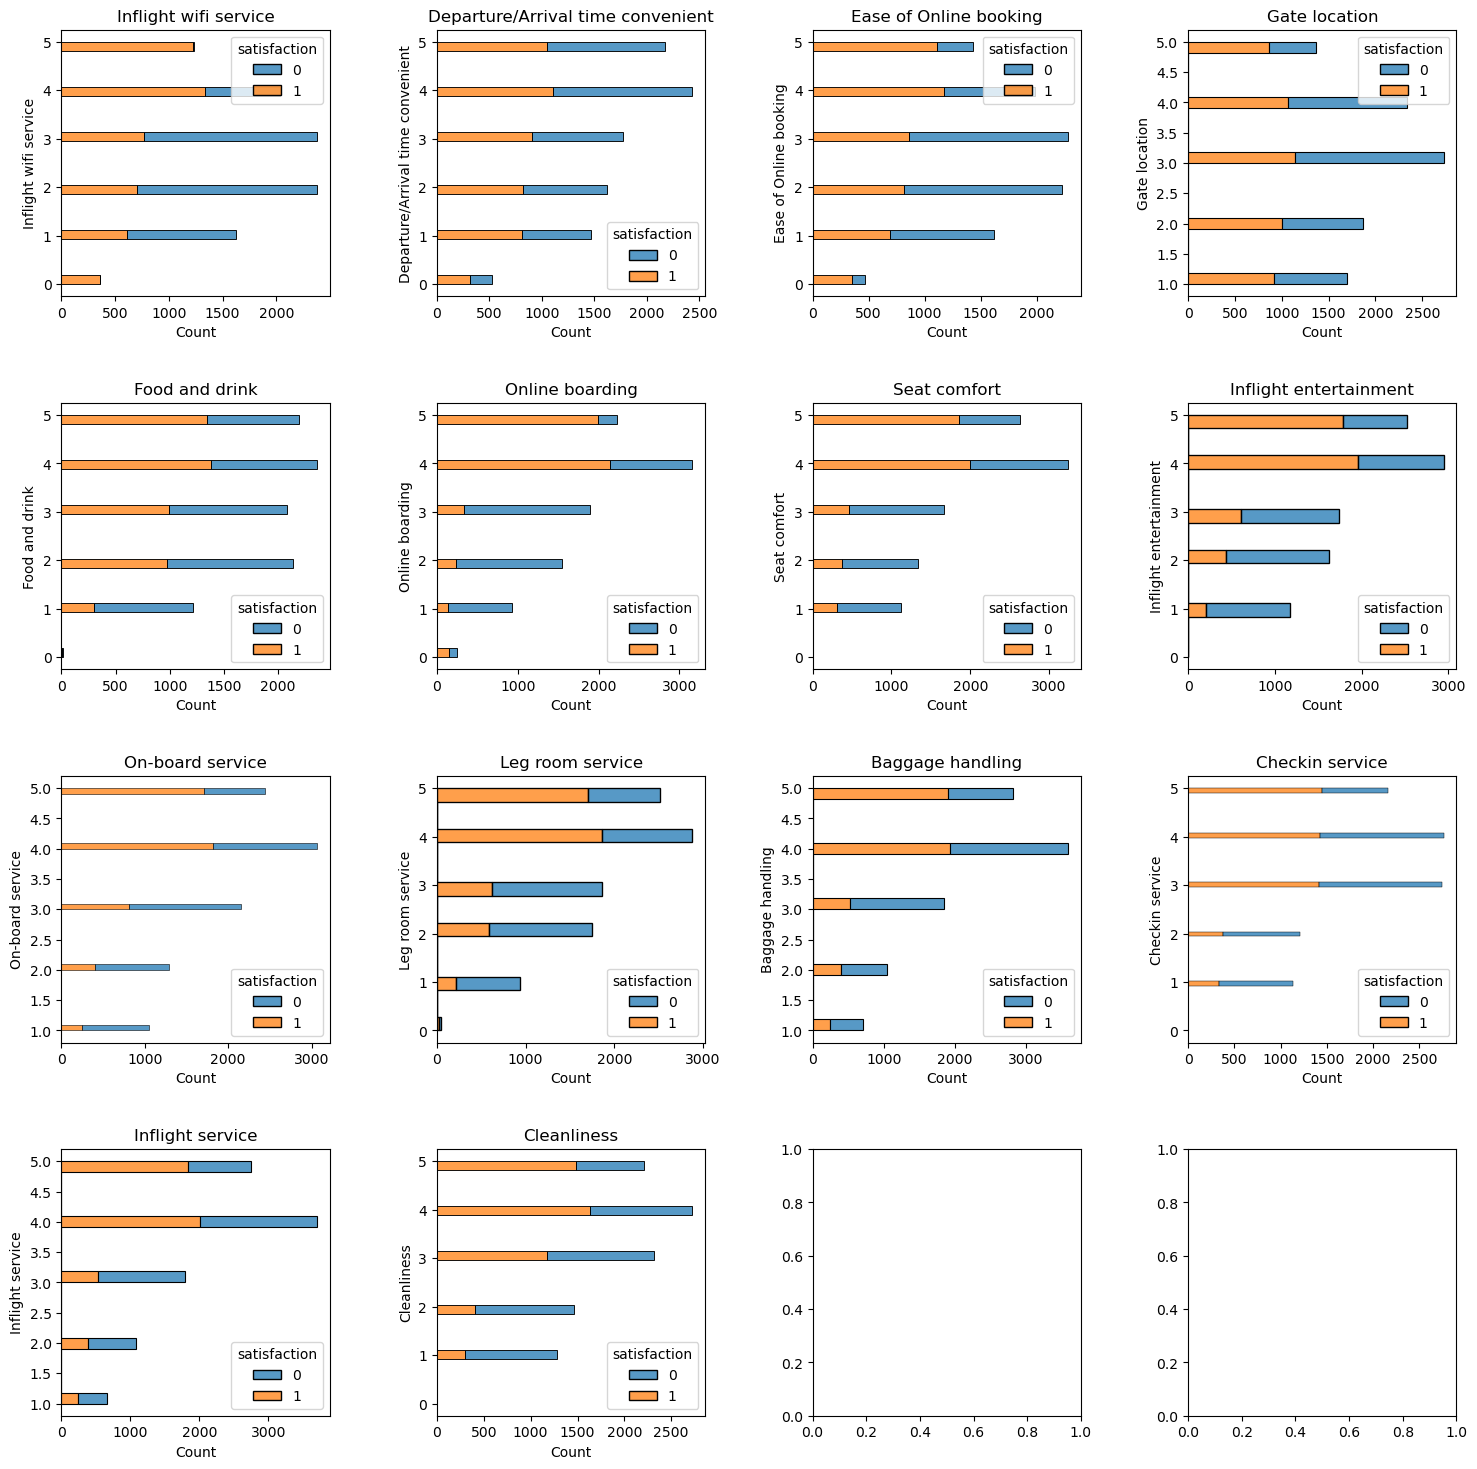

In [14]:
score_cols=[col for col in train.columns if train[col].dtype!='object' and train[col].max()<=5 and col!='satisfaction']
fig,ax=plt.subplots(4,4,figsize=(18,18))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
axes=[ax[0,0],ax[0,1],ax[0,2],ax[0,3],ax[1,0],ax[1,1],ax[1,2],ax[1,3],ax[2,0],ax[2,1],ax[2,2],ax[2,3],ax[3,0],ax[3,1],ax[3,2],ax[3,3]]
for i in range(len(score_cols)):
    sns.histplot(ax=axes[i],data=train,y=score_cols[i],hue='satisfaction',multiple='stack')
    axes[i].set_title(score_cols[i])
            

In [15]:
cats=['Gender','Customer Type','Age','Type of Travel','Class']
training=train.copy()
testing=test.copy()
for cat in cats:
    training[cat]=LabelEncoder().fit_transform(training[cat])
    testing[cat]=LabelEncoder().fit_transform(testing[cat])
training    

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,26,0,1,571,2,3,2,4,4,2,4,4,3,1,3,4,3,4,10,3.0,0
2,0,0,42,0,0,1431,4,1,4,4,3,5,4,5,5,5,5,3,5,3,0,0.0,1
3,0,0,36,0,1,867,1,4,4,4,4,4,3,1,1,1,1,1,1,2,0,18.0,0
4,0,0,20,0,0,1550,3,3,3,3,2,2,2,2,4,4,5,5,4,2,0,0.0,1
5,1,0,4,1,1,526,3,4,3,2,4,3,4,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,47,1,1,1068,1,4,1,2,2,5,4,4,4,1,4,4,4,3,21,12.0,0
9997,0,0,47,0,2,1399,4,1,1,1,2,3,3,4,4,4,4,1,4,4,34,21.0,0
9998,1,0,39,0,0,1440,3,3,2,3,3,4,5,4,4,4,4,3,4,3,37,38.0,1


In [16]:
training.corrwith(training.satisfaction).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Type of Travel                       0.482266
Class                                0.463430
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Customer Type                        0.181592
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048573
Departure Delay in Minutes           0.042960
Gate location                     

# Ma'lumotlarni tayyorlash

In [160]:
cols=['Online boarding','Type of Travel','Class','Inflight entertainment','Seat comfort',
      'On-board service','Leg room service','Cleanliness','Flight Distance','Inflight wifi service',
      'Baggage handling','Inflight service','Checkin service','Food and drink','Customer Type',
      'Ease of Online booking','Age','Departure/Arrival time convenient','Arrival Delay in Minutes','Departure Delay in Minutes']
normalize=['Flight Distance','Age','Arrival Delay in Minutes','Departure Delay in Minutes']
training[normalize]=training[normalize]/training[normalize].max()
testing[normalize]=testing[normalize]/testing[normalize].max()
train_X=training[cols].values
train_y=training['satisfaction'].values
test_X=testing[cols].values

# Machine Learning

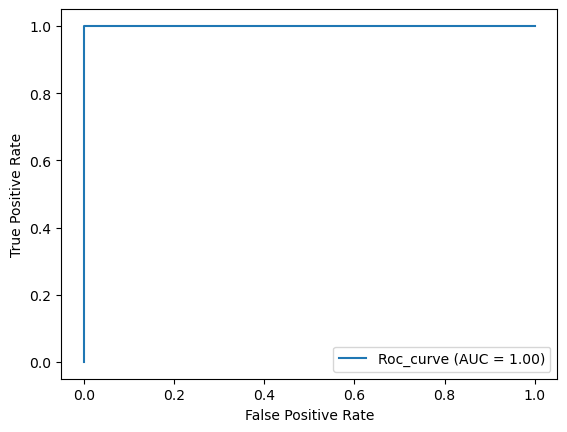

In [161]:
def curve_display(model):
    
    model.fit(train_X,train_y)
    model.predict(test_X)
    predict_X=model.predict(train_X)

    fpr,tpr,thresholds=roc_curve(train_y,predict_X)
    roc_auc=auc(fpr,tpr)
    display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Roc_curve')
    display.plot()
    plt.show()
    
curve_display(RandomForestClassifier(random_state=23))    

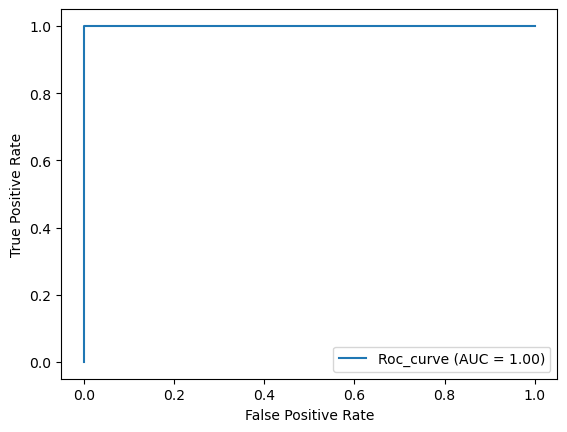

In [162]:
curve_display(DecisionTreeClassifier(random_state=23))

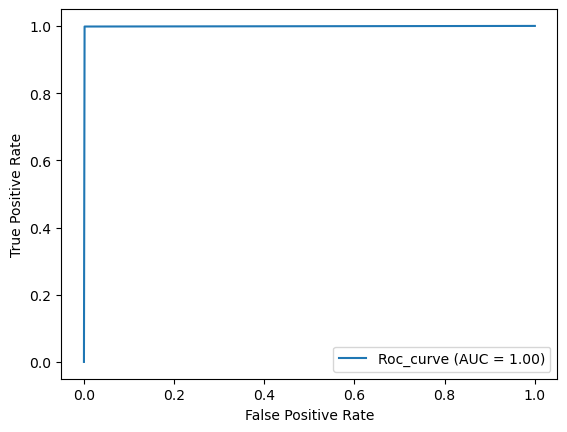

In [163]:
curve_display(XGBClassifier(random_state=23))

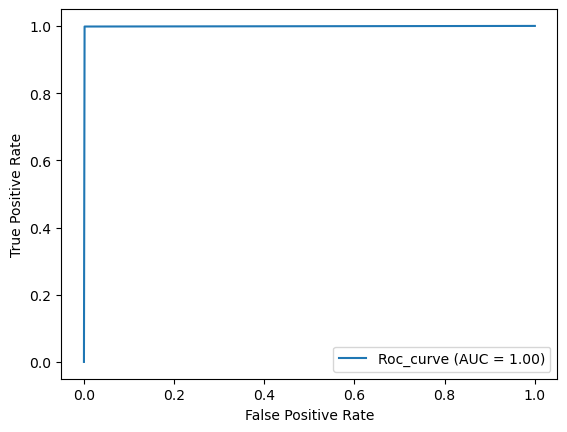

In [164]:
curve_display(XGBClassifier(random_state=23))

In [168]:
i=1
k = 5
predictions=[]
X=training.drop(['satisfaction','Gate location','Gender'],axis=1).values
y=training['satisfaction'].values

kf = KFold(n_splits=k, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    RF=RandomForestClassifier(random_state=23)
    RF.fit(X_train,y_train)
    predict_train=RF.predict(X_train)
    predict=RF.predict(test_X)
    predictions.append(predict)
    accuracy=accuracy_score(y_train,predict_train)
    print(f'Accuracy-{i}: {accuracy*100} %')
    i+=1

Accuracy-1: 100.0 %
Accuracy-2: 100.0 %
Accuracy-3: 100.0 %
Accuracy-4: 100.0 %
Accuracy-5: 100.0 %


In [166]:
best_model=RandomForestClassifier(random_state=23)
best_model.fit(train_X,train_y)
predict=best_model.predict(test_X)
data=pd.DataFrame(np.array([np.arange(1,len(predict)+1),predict]).T,columns=['id','satisfaction'])
data.to_csv('Submission.csv',index=False)

In [167]:
pd.read_csv('Submission.csv')

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1
